# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2023/)    
## 1MS041, 2023 
&copy;2023 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# Generating random variables in different forms

In [3]:
from Utils import linConGen
import numpy as np
import matplotlib.pyplot as plt
from Utils import discrete_histogram

In [15]:
m,a,b = (2**32, 1103515245,12345)
seed = 1
np.array(linConGen(m,a,b,seed,10))/m

array([2.32830644e-10, 2.56935039e-01, 5.87870652e-01, 1.54325758e-01,
       7.67266943e-01, 9.73813963e-01, 5.85868151e-01, 8.51115584e-01,
       6.13215341e-01, 7.47386723e-01])

In [22]:
def random():
    """Generates one random sample from the uniform [0,1] distribution"""
    global seed
    print("seed: ", seed)
    seed = linConGen(m,a,b,seed,2)[1]
    
    return seed/m

In [17]:
unif_x = [random() for i in range(1000)]

seed:  1
seed:  1103527590
seed:  2524885223
seed:  662824084
seed:  3295386429
seed:  4182499122
seed:  2516284547
seed:  3655513600
seed:  2633739833
seed:  3210001534
seed:  267834847
seed:  180171308
seed:  836760821
seed:  595337866
seed:  2937909499
seed:  2111915288
seed:  3297241969
seed:  3791773014
seed:  3535774167
seed:  3794901700
seed:  3823029677
seed:  3914758370
seed:  2473755763
seed:  1343201072
seed:  675780521
seed:  744964398
seed:  1969681615
seed:  1116175964
seed:  3008955749
seed:  1303003706
seed:  3834121963
seed:  4147913800
seed:  4015624929
seed:  4008331270
seed:  1448521415
seed:  3776134388
seed:  3397090333
seed:  835903122
seed:  2911203427
seed:  2577478752
seed:  1775811865
seed:  3040629214
seed:  995405759
seed:  2102736524
seed:  271520213
seed:  456633834
seed:  2058258651
seed:  3731173240
seed:  3025925713
seed:  3822763702
seed:  1627576247
seed:  2054802212
seed:  2207819405
seed:  684462146
seed:  3772987475
seed:  2669311376
seed:  126603

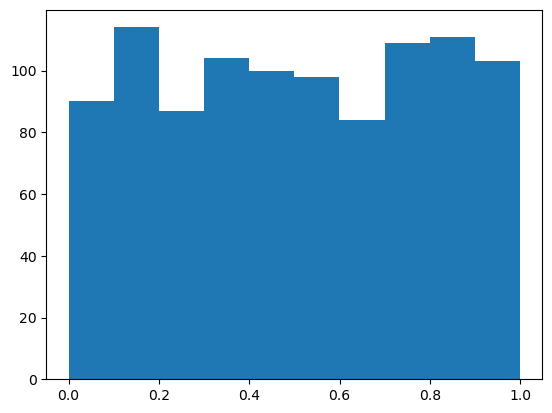

In [5]:
_=plt.hist(unif_x,bins=10)

## Generating Bernoulli rv.s

In [6]:
def unif_to_bernoulli(x,p):
    from math import floor
    return floor(x+p)

In [7]:
bernoulli_x = [unif_to_bernoulli(random(),0.9) for i in range(1000)]

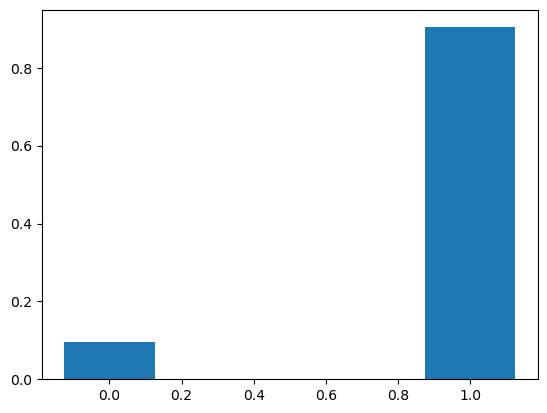

In [8]:
discrete_histogram(bernoulli_x,normed=True)

## Generating integers with different probabilites

In [9]:
import numpy as np

In [10]:
p = np.array([0.1,0.2,0.5,0.2])

In [11]:
p_cumsum = np.cumsum(p)

In [12]:
p_cumsum

array([0.1, 0.3, 0.8, 1. ])

In [13]:
uniform_x = np.array([random() for i in range(10000)])
#np.argmax(uniform_x-p_cumsum,)

In [14]:
xp = (uniform_x.reshape(-1,1)-p_cumsum.reshape(1,-1)) # (100,1), (1,4) -> (100,4)
xp.shape

(10000, 4)

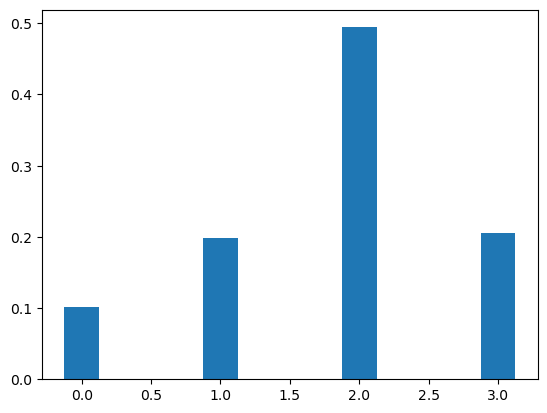

In [15]:
from Utils import discrete_histogram
discrete_histogram(np.argmax(xp <= 0,axis=1),normed=True)

## Shuffling an array

```-- To shuffle an array a of n elements (indices 0..n-1):
for i from n−1 downto 1 do
     j ← random integer such that 0 ≤ j ≤ i
     exchange a[j] and a[i]```

### my notes
let's say we have data that is iid, then shuffling serves no purpose, as iid has no order in it
if the data has order, then it is recommended that one always shuffles. Important for ML/classification where one specifies train set and test set, if you do not shuffle an ordered dataset, then it fucks the classification up, as if you take an ordered first half and have it as train, and other half as test, then we have a problem as they were ordered.

take top card in the deck, randomly replace it with another card somewhere in the deck, and keep doing that until all cards positions are random


This is our inverse function
$$
F^{-1} (y) = \inf{x:F(x) \geq y}
$$

In [18]:
def randint(b):
    """Producing random integers between 0 and b inclusive"""
    u = random()
    from math import floor
    return floor(u*(b+1)) #random nr, multiply by b+1, b is largest number you can see, 
#1 is smallest you can see, and then do floor (to get an equal small spacing between datapoints)
#, this is the inverse of the true discrete distribution




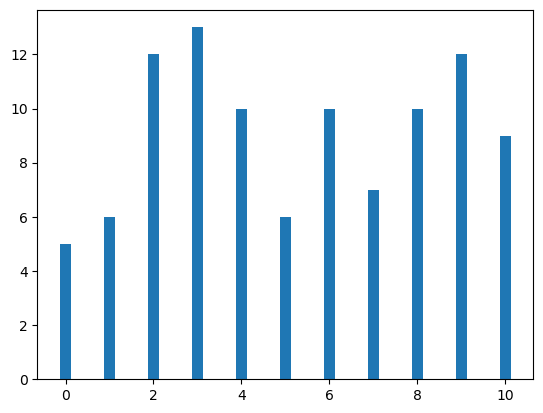

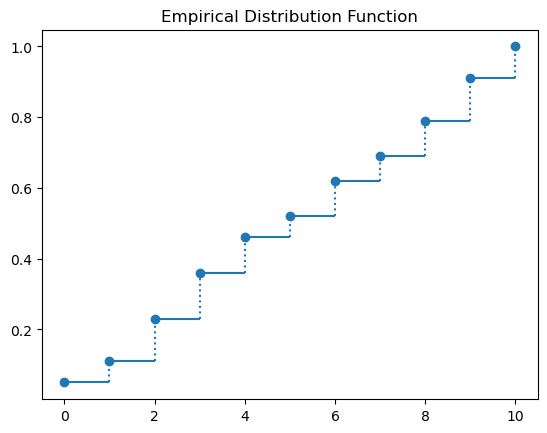

In [19]:
from Utils import plotEDF,makeEDF
random_samples_int = [randint(10) for i in range(100)]
discrete_histogram(random_samples_int)
plotEDF(makeEDF(random_samples_int))

In [20]:
arr = np.arange(0,100)
n = len(arr)
for i in range(n-1,0,-1):
    j = randint(i) # Random integer between 0 and i inclusive
    tmp = arr[j] #store position of j in temporary variable
    arr[j] = arr[i] #replace 
    arr[i] = tmp

In [21]:
arr

array([11, 32,  8, 12, 30, 55, 48, 16, 73, 20, 47,  2, 61, 54, 45, 57, 60,
       50, 87, 70, 21, 41, 24, 71, 40, 34, 69, 74, 76, 82, 14, 97,  9,  7,
       58, 92, 62, 78, 37, 83, 81, 29, 39,  0,  4, 72, 56,  6, 26, 80, 15,
       77, 66, 65, 46, 36, 86, 63, 33, 85,  3, 95, 19, 88, 91, 93, 79, 84,
       64, 59, 31, 42, 49,  1,  5, 51, 52, 23, 22, 94, 38, 13, 96, 90, 68,
       18, 53, 98, 25, 35, 10, 75, 17, 99, 44, 27, 28, 67, 43, 89])

In [22]:
def random_shuffle(arr):
    """Shuffles an array in place"""
    n = len(arr)
    for i in range(n-1,0,-1):
        j = randint(i) # Random integer between 0 and i inclusive
        tmp = arr[j]
        arr[j] = arr[i]
        arr[i] = tmp
    return arr

In [23]:
aa = np.arange(10)
random_shuffle(aa)
aa

array([1, 3, 4, 8, 0, 2, 5, 9, 6, 7])

In [24]:
#från genomgången

from sklearn.datasets import make_classification
X, y= make_classification()


In [25]:
#från genomgången
index = np.arange(0, len(y))
random_shuffle(index)
X_shuffle = X[index, :]
y_shuffle = y[index]

#this shuffles x and y the same way

## Permutation testing
See chapter 10 in All of Statistics

### my notes

what is permutation testing?
How can you distinguish if two numbers are from the same mean value? 

In [38]:
from math import floor
X = np.array([floor(random()+0.5) for i in range(100)])
Y = np.array([floor(random()+0.2) for i in range(100)])
XY = np.concatenate([X,Y])

In [39]:
def compute_diff(arr):
    return np.abs(np.mean(arr[:100])-np.mean(arr[100:])) #compute difference for the first from X, 
#first from Y

In [40]:
compute_diff(XY)

0.26

In [41]:
differences = np.array([compute_diff(random_shuffle(XY)) for i in range(10000)])

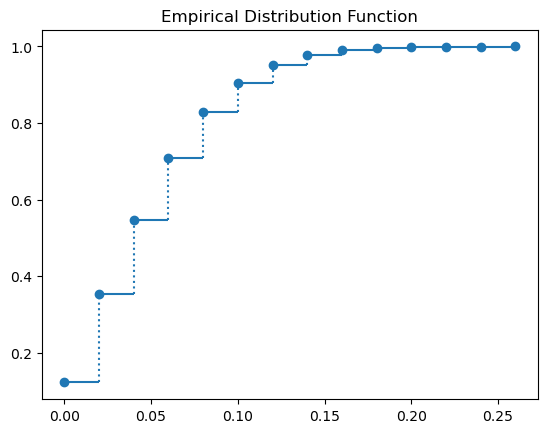

In [42]:
from Utils import plotEDF,makeEDF
plotEDF(makeEDF(differences))

## Box Muller

Suppose that $U_1,U_2 \overset{\text{IID}}{\sim} \text{Uniform}([0,1])$, then
\begin{align*}
    Z_0 &= \sqrt{-2\ln(U_1)} \cos(2\pi U_2) \\
    Z_1 &= \sqrt{-2\ln(U_1)} \sin(2\pi U_2) \\
\end{align*}
are independent random variables, and $Z_0,Z_1 \sim \mathcal{N}(0,1)$.

### my notes

generate two samples from the uniform dist, U1 U2. Then you generate Z0, Z1
Then it turns out that these are gaussian

It is gaussian as it has to do with two cirles (cos/sin) and shape of the term before it (rotenur)
It is easier to do in 2D than in 1D

In [43]:
uniform_sequence = np.array([random() for i in range(10000)])
re_unif = uniform_sequence.reshape(-1,2)
Z1 = np.sqrt(-2*np.log(re_unif[:,0]))*np.cos(2*np.pi*re_unif[:,1])
Z2 = np.sqrt(-2*np.log(re_unif[:,0]))*np.sin(2*np.pi*re_unif[:,1])
Z = np.column_stack([Z1,Z2]) #stacks these arrays in two columns

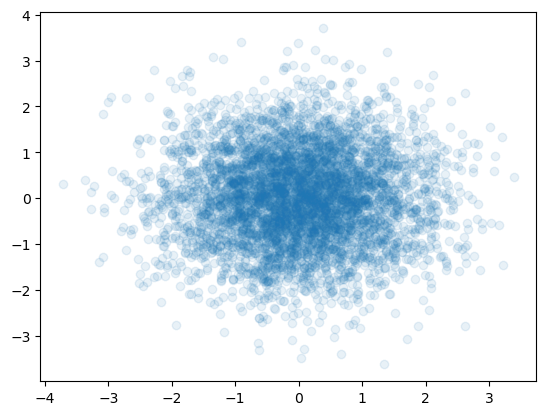

In [45]:
import matplotlib.pyplot as plt
plt.scatter(Z1,Z2,alpha=0.1)

#this is gaussian, but doesn't look like it

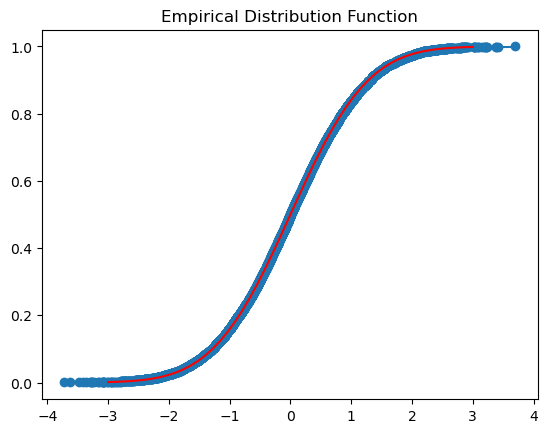

In [46]:
from Utils import makeEDF,plotEDF
from scipy.stats import norm
x_plot = np.linspace(-3,3)
plotEDF(makeEDF(Z.flatten()),force_display=False)
plt.plot(x_plot,norm.cdf(x_plot),color='red')

#red is the one from scipi, the blue is simulated

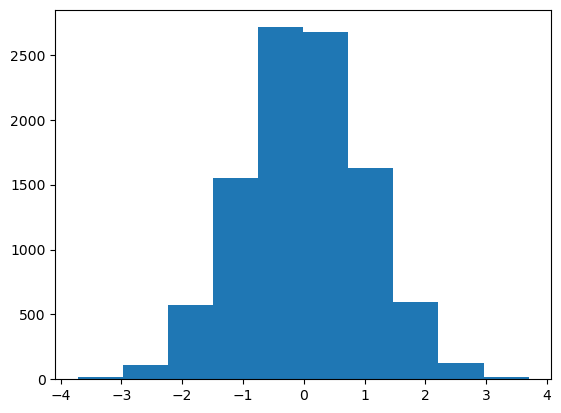

In [47]:
_=plt.hist(Z.flatten())

## Rejection sampling


1. input
    * a target density $f(x)$
    * a sampling density $g(x)$ that satisfies $f(x) \leq M g(x)$
2. output: a sequence of samples $x_0, \ldots$ with distribution $f$

1. Sample initial state $X^{(0)}$ from $g$

**REPEAT**
1.  At iteration $t$,
2.  Generate $x$ from $g$ and compute the ratio $r(x) = \frac{f(x)}{Mg(x)}$
3.  Draw $U \sim \text{uniform}([0,1])$ and set $X^{{t+1}} = x$, if $U \leq r(x)$, otherwise goto 2?

**UNTIL** desired number of samples are obtained.

Let us sample from the uniform distribution on the unit circle, our proposal distribution can be taken to be the uniform distribution on the 2-square. The area of the circle is $r^2 \pi$, i.e. the density $f$ should be $1/\pi$ on the circle and 0 elsewhere. The 2-square has area $4$ so the density of $g = 1/4$, we thus need $M = 4/\pi$

### my notes: called rejection sample or accept/reject

rejection sampling is good for a complicated looking f(x) - see handwritten notes 
rejection sampling avoids computing inverses

target density = you have to have a function that you know, with a target density you know
you need to have another function

it is good if this ratio (f(x) / g(x)) is close to 1, close to 1 means that you will accept everything, ratio close to 0, you will reject almost surely. Is an acceptance ratio
draw a uniform distributed RV and set the next sample to be X if U <= this ratio. 
You keep doing this until you have one sample

if you have chosen the value M to be too big, you will also reject more


let's say we want to generate samples from the disc, take a square that covers the disc, M = 4 (due to 2x2 length square) and 1/pi as pi is the radius of a unit circle. Choose M = 4/pi

We have chosen M so that M*g(x) = f(x)

The ratio in this case then becomes particularly simple, f(x) / M* g(x) is simple, 1 if in the cirlce, 0 if outside the circle

The idea of this is to generate samples that are within the circle/disk
All other, the points outside, are discarded

ONLY use rejection sampling when you cannot do sampling by hand (by e.g. calculating the inverse)
A bad result is rejection 99% of candidates

In [55]:
samples = []
rejections = 0
while (len(samples) < 10000):
    # We know that the ratio is 1 when x is in the circle and 0 if it is outside
    (X1,X2) = (2*random()-1,2*random()-1)
    if (np.linalg.norm([X1,X2]) <= 1): # We are inside the circle
        samples.append((X1,X2))
    else: #check how often we reject a possible sample that is outside the circle
        rejections += 1

In [60]:
#show the # rejections
rejections/len(samples)

0.2629

In [ ]:
rejections/

In [57]:
samp_arr = np.array(samples)

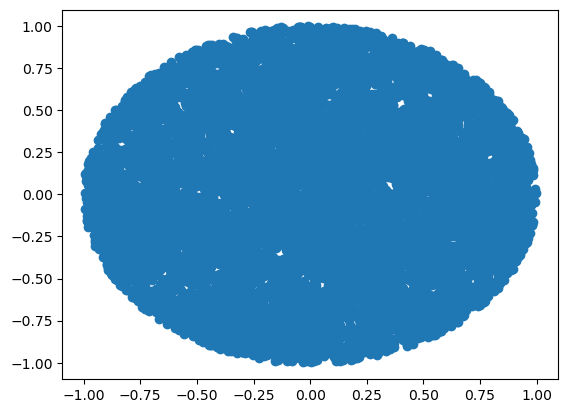

In [58]:
plt.scatter(samp_arr[:,0],samp_arr[:,1])

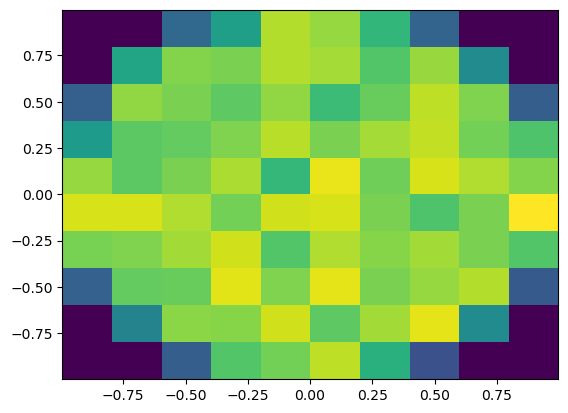

In [59]:
_=plt.hist2d(samp_arr[:,0],samp_arr[:,1])

## Sampling from the Poisson

The Poisson has distribution function
$$
    F(x) = e^{-\lambda} \sum_{j=0}^{\lfloor x \rfloor} \frac{\lambda^j}{j!}
$$  


In [38]:
def sample_poisson():
    from scipy.special import factorial
    Y = random()
    l = 2

    F = 0
    for i in range(1000):
        F = F + np.exp(-l)*np.power(l,i)/factorial(i)
        if (F > Y):
            break
    return i

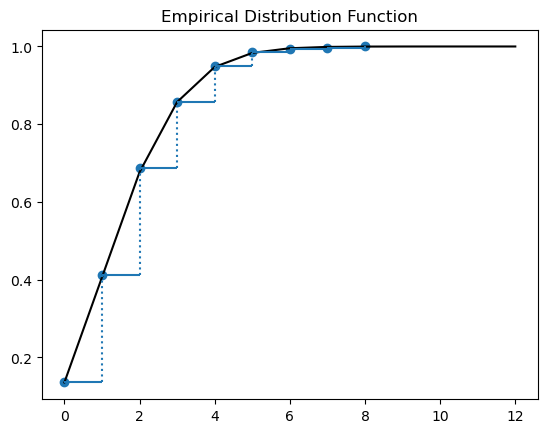

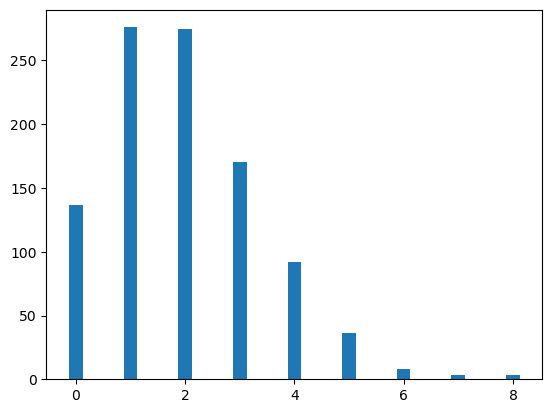

In [71]:
poisson_samples = [sample_poisson() for i in range(1000)]
f = []
for i in range(13):
    f.append(np.exp(-l)*np.power(l,i)/factorial(i))
F = np.cumsum(f)
plt.plot(F,color='black')
plotEDF(makeEDF(poisson_samples))
discrete_histogram(poisson_samples)